# Ordinary differential equations: introduction


This notebook is based on Chapter 12 of 

<a id='thebook'></a>

> Süli, Endre and Mayers, David F. _An introduction to numerical analysis_. Cambridge University Press, Cambridge, 2003. <https://doi.org/10.1017/CBO9780511801181> (ebook in [Helka](https://helka.helsinki.fi/permalink/358UOH_INST/1h3k2rg/alma9926836783506253)) 


Ordinary differential equations are ubiquitous. For example, if forces acting on a particle are known, they can be substituted into Newton's second law to obtain an ordinary differential equation. This is the basis of [classical mechanics](https://en.wikipedia.org/wiki/Classical_mechanics). Another example is given by [compartmental models in epidemiology](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology). 

For instance, the [JHUAPL-Bucky](https://docs.buckymodel.com/en/latest/model_overview.html) model, developed in the Johns Hopkins University Applied Physics Lab, is a COVID-19 metapopulation compartment model initally designed to estimate case incidence and healthcare usage at the county level in the United States. It is written using the Python ecosystem, with the code available in [GitHub](https://github.com/mattkinsey/bucky).

# Initial value problem

Let $f : \mathbb R \times \mathbb R \to \mathbb R$ be a continuously differentiable function, and consider the differential equation

$$
y' = f(x, y)
$$

for a function $y(x)$. We want to solve for $y$ on an interval $[a, b]$, with $a < b$, given the initial condition $y(a) = y_0$, with $y_0 \in \mathbb R$.
A problem of this form is called an _initial value problem_, and assuming that $b-a$ is small, it has a unique solution due to the [Picard-Lindelöf theorem](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem).

# Euler's method

The initial value problem 

$$
y' = f(x, y), \quad y(a) = y_0,
$$

can be solved using Euler's method. We choose $N = 1, 2, \dots$,
and define the _uniform mesh_ of size $h = (b-a)/N$ on $[a, b]$ by 

$$
x_n = a + nh, \qquad n=0,\dots,N.
$$

Note that $x_0 = a$ and $x_N = b$. Then we define

$$
y_{n+1} = y_n + h f(x_n, y_n), \qquad n = 0,\dots,N-1.
$$

We will show below that $y_n$ is close to $y(x_n)$ when $h$ is small. 
Here $y$ is the unique solution to the initial value problem.

One way to motivate Euler's method is to replace $y'$ by its forward finite difference approximation

$$
y'(x_n) \approx \frac{y(x_{n+1}) - y(x_{n})}{h}.
$$

Then solving for $y(x_{n+1})$ and using the equation $y' = f(x, y)$,

$$
y(x_{n+1}) \approx y(x_{n}) + h y'(x_n) = y(x_{n}) + h f(x_n, y(x_n)).
$$

## Example: testing Euler's method

Let us consider a differential equation of the form

$$
y' = y^2 + g(x), \quad y(0) = y_0.
$$

In general, we prefer to test a computational method against a solution given in closed form. A way to do this is to first choose the solution then compute the source terms. As a concrete example, let 

$$
y = \frac{(1-x)(2-x)}{1+x}
$$

and then define 

$$
g = y' - y^2 =  \frac{- x^{4} + 6 x^{3} - 12 x^{2} + 14 x - 9}{(x + 1)^{2}},
\quad
y_0 = y(0) = 2. 
$$

In [65]:
# Let's verify the symbolic computation 
import sympy as sp
from sympy.abc import x
y = (1-x)*(2-x) / (1+x)
g = sp.simplify(sp.diff(y, x) - y**2)
g

(-x**4 + 6*x**3 - 12*x**2 + 14*x - 9)/(x**2 + 2*x + 1)

In [66]:
# Let's display g also in Python 
# (This is useful for copy-pasting)
print(g)

(-x**4 + 6*x**3 - 12*x**2 + 14*x - 9)/(x**2 + 2*x + 1)


In [67]:
import numpy as np
def euler_demo(f, y0, x):
    '''Euler's method'''
    N = np.size(x)
    h = x[1] - x[0] # suppose uniform mesh
    y = np.zeros(N)
    y[0] = y0
    for n in range(N-1):
        y[n+1] = y[n] + h * f(x[n],y[n]) 
    return y

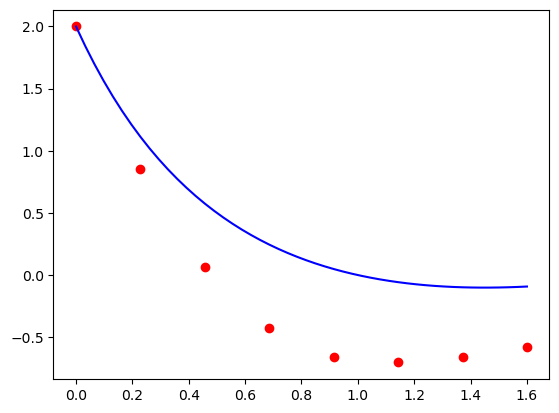

In [68]:
def g(x):
    return (-x**4 + 6*x**3 - 12*x**2 + 14*x - 9)/(x**2 + 2*x + 1)
def f(x, y):
    return y**2 + g(x)
y0 = 2

X = 1.6; N = 8
xs = np.linspace(0, X, N)
ys = euler_demo(f, y0, xs)

# Let's compare with the true solution
import matplotlib.pyplot as plt
y_exact = sp.lambdify(x, y)
plt.plot(xs, ys, 'ro')
xs_plot = np.linspace(0, X)
plt.plot(xs_plot, y_exact(xs_plot), 'b');

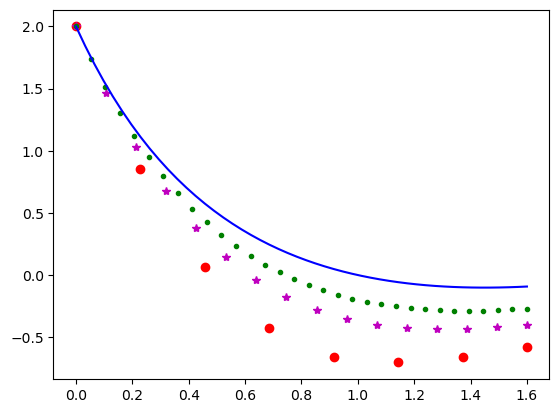

In [69]:
# Let's see how the method converges
Ns = 8 * np.array([1, 2, 4])
markers = ['ro', 'm*', 'g.']
for n in range(np.size(Ns)):
    N = Ns[n]
    xs = np.linspace(0, X, N)
    ys = euler_demo(f, y0, xs)
    plt.plot(xs, ys, markers[n])
plt.plot(xs_plot, y_exact(xs_plot), 'b');

# One-step methods

A one-step method is of the form

$$
y_{n+1} = y_n + h \Phi(x_n, y_n, h)
$$

where $\Phi$ is a continuous function defining the method. 

For example, Euler's method corresponds to 

$$
\Phi(x,y,h) = f(x,y).
$$

<div style="padding:25px; border: 2px solid gray;">

## Theorem: convergence of one-step method

Let $Y \subset \mathbb R$ and $y : [a, b] \to Y$.
Suppose that there are $L, h_0 > 0$ s.t. for all $h \in [0, h_0]$, $x \in [a, b]$ and $u,v \in Y$ 

\begin{align*}
|\Phi(x,u,h) - \Phi(x,v,h)| \le L |u - v|.
\end{align*}

Let $x_n$, $n = 0, \dots, N$, be the uniform mesh of size $h \in (0, h_0)$ on $[a,b]$, define $y_{n+1} = y_n + h \Phi(x_n, y_n, h)$, $y_0 = y(a)$, and suppose $y_n \in Y$ for all $n = 1,\dots,N$.
Then

\begin{align*}
|y(x_n) - y_n| \le \frac{T}{L} \left( e^{L (x_n - x_0)} - 1\right),
\quad n=0,\dots,N,
\end{align*}

where $T$ is the maximum over $n = 0,\dots,N-1$ and $h \in [0,h_0]$ of the absolute values of truncation errors

\begin{align*}
T_n = \frac{y(x_{n+1}) - y(x_{n})}{h} - \Phi(x_n, y(x_n), h).
\end{align*}
</div>

For a proof, see Theorem 12.2 of [the book](#thebook). The proof is based on the next lemma. 

<div style="padding:25px; border: 2px solid gray;">

## Lemma: recursive affine bound

Let $k > 1$, $b \ge 0$ and $x_0 = 0$. Suppose that a sequence $x_n \ge 0$, $n = 1, 2, \dots$, satisfies

$$
x_{n+1} \le k x_n + b.
$$
Then 
$$
x_n \le b \frac{k^n - 1}{k - 1}.
$$
</div>

_Proof_. Let us prove by induction that $x_n \le b (k^{n-1} + \dots + k + 1)$. It follows from  $x_0 = 0$ that the base case $x_1 \le b$ holds. Using the inductive hypothesis, the induction step

$$
x_{n+1} \le k x_n + b \le k b (k^{n-1} + \dots + 1) + b = b (k^n + \dots + 1)
$$

is proven. We conclude by using the [formula for a geometric sum](https://en.wikipedia.org/wiki/Geometric_series#Sum),

$$
x_n \le b (k^{n-1} + \dots + k + 1) = b \frac{1 - k^n}{1 - k}.
$$
$\blacksquare$

The truncation error for Euler's method coincides with the error in forward finite difference. Indeed,

$$
T_n = \frac{y(x_{n+1}) - y(x_{n})}{h} - f(x_n, y(x_n))
= \frac{y(x_{n+1}) - y(x_{n})}{h} - y'(x_n).
$$

Hence, by the error in forward finite difference corollary, 

\begin{align*}
|T_n| \le h \|y''\|_\infty.
\end{align*}

Writing $C = e^{L (b- a)}/L$, there holds

$$
\quad\text{and}\quad
|y(x_n) - y_n| \le C\|y''\|_\infty h.
$$

We say that Euler's method is first order accurate.

## Trapezium rule method

The trapezium rule method is defined by 

$$
y_{n+1} = y_n + \frac h 2 (f(x_n, y_n) + f(x_{n+1}, y_{n+1})).
$$

Observe that $y_{n+1}$ appears on the right-hand side. Methods with this property are called _implicit_, in contrast to _explicit_ methods such as Euler's method. 

The trapezium rule method is motivated by writing 

\begin{align*}
y(x_{n+1}) - y(x_n) 
&= 
\int_{x_n}^{x_{n+1}} y'(x) dx 
= 
\int_{x_n}^{x_{n+1}} f(x, y(x)) dx
\\&\approx 
\frac h 2 (f(x_n, y(x_n)) + f(x_{n+1}, y(x_{n+1}))),
\end{align*}

where we used the trapezium rule to approximate the integral.

The trapezium rule method can be viewed as a one-step method with $\Phi$ defined implicitly by 

$$
\Phi(x,y,h) = \frac 1 2 (f(x, y) + f(x + h, y + h \Phi(x,y,h))).
$$

Observe that the equation 

$$
\phi - \frac h 2 (f(x, y) + f(x + h, y + h \phi)) = 0
$$

has the solution $\phi = 0$ in the case that $h=0$. 
Differentiating the left-hand side of the equation with respect to $\phi$ at $h = 0$
gives $1$. Hence the [implicit function theorem](https://en.wikipedia.org/wiki/Implicit_function_theorem) guarantees that there is a unique small solution for small $h>0$. The solution $\phi$ will depend on $x$, $y$ and $h$, and it defines the function $\Phi$. 

Suppose that $f$ is [Lipschitz continuous](https://en.wikipedia.org/wiki/Lipschitz_continuity) with a constant $K > 0$. Then $\Phi$ is Lipschitz continuous in its second argument, as required in the convergence of one-step method theorem. Indeed, 

\begin{align*}
&|\Phi(x, u, h) - \Phi(x, v, h)|
\\&\quad\le 
\frac 1 2 |f(x,u) - f(x, v)| 
\\&\qquad+ \frac 1 2 |f(x+h, u + h \Phi(x, u, h)) - f(x+h, v + h \Phi(x, v, h))|
\\&\quad\le 
\frac K 2 |u - v| 
+ \frac K 2 |u + h \Phi(x, u, h) - (v + h \Phi(x, v, h))|
\\&\quad\le 
 K  |u - v| + h \frac K 2 |\Phi(x, u, h) - \Phi(x, v, h)|,
\end{align*}

and, for small $h>0$, we can take $L = K / (1-hK/2)$ using the notation from the theorem.


To apply the convergence of one-step method theorem, we still need to bound the truncation error

\begin{align*}
T_n 
&= 
\frac{y(x_{n+1}) - y(x_{n})}{h} - \Phi(x_n, y(x_n), h)
\\&= 
\frac{y(x_{n+1}) - y(x_{n})}{h} - \frac 1 2 (f(x_n, y(x_n)) + f(x_n + h, y(x_n) + h \Phi(x_n, y(x_n), h)))
\\&= T_{n,1} + T_{n,2},
\end{align*}
where
\begin{align*}
T_{n,1} &= \frac{y(x_{n+1}) - y(x_{n})}{h} - \frac 1 2 (f(x_n, y(x_n)) + f(x_{n+1}, y(x_{n+1}))),
\\
2 T_{n,2} &= f(x_{n+1}, y(x_{n+1})) - f(x_n + h, y(x_n) + h \Phi(x_n, y(x_n), h)).
\end{align*}

We have 
\begin{align*}
T_{n,1}&=
\frac{y(x_{n+1}) - y(x_{n})}{h} - \frac 1 2 (f(x_n, y(x_n)) + f(x_{n+1}, y(x_{n+1})))
\\&= 
\frac 1 h \left( \int_{x_n}^{x_{n+1}} f(x,y(x)) dx  - \frac h 2 (f(x_n, y(x_n)) + f(x_{n+1}, y(x_{n+1}))) \right).
\end{align*}

But this is just the error in the trapezium rule, multiplied by $h^{-1}$.
Writing $F(x) = f(x,y(x))$, the error in Newton-Cotes theorem gives

$$
T_{n,1} \le \|(h\partial)^2 F\|_\infty.
$$

We will show that also $T_{n,2} \le C h^2$ for some $C > 0$. Then the convergence of one-step method theorem implies that 
$$
|y(x_n) - y_n| \le C h^2.
$$

We say that the trapezium rule method is second order accurate.

We expand in Taylor series

\begin{align*}
2 T_{n,2} 
&= 
f(x_{n+1}, y(x_{n+1})) - f(x_n + h, y(x_n) + h \Phi(x_n, y(x_n), h))
\\&= 
f(x_n, y(x_n)) + h \partial_x f(x_n, y(x_n)) + h \partial_y f(x_n, y(x_n)) y'(x_n)
\\&\quad-
(f(x_n, y(x_n)) + h \partial_x f(x_n, y(x_n)) + h \partial_y f(x_n, y(x_n)) \Phi(x_n, y(x_n), 0)) + \mathcal O(h^2).
\end{align*}

It remains to show that $\Phi(x_n, y(x_n), 0) = y'(x_n)$. But

$$
\Phi(x_n, y(x_n), 0)
= 
\frac 1 2 (f(x_n, y(x_n)) + f(x_n, y(x_n))
= f(x_n, y(x_n)) = y'(x_n).
$$

## Example: testing the trapezium rule method

Let us consider again the differential equation 

$$
y' = y^2 + g(x), \quad y(0) = y_0.
$$

where $g$ is as in the [testing Euler's method example](#Example:-testing-Euler's-method). We will solve $y_{n+1}$ from $F_n(y_{n+1}) = 0$ where 

$$
F_n(y) = y - y_n - \frac h 2 (f(x_n, y_n) + f(x_{n+1}, y)),
$$

by using Newton's method. For this we need to compute also the derivative

$$
F_n'(y) = 1 - \frac h 2 \partial_y f(x_{n+1}, y).
$$

For the example problem, $f(x,y) = y^2 + g(x)$ and $\partial_y f(x,y) = 2 y$.

In [70]:
import scipy.optimize as opt

def trapezium_demo(f, dfdy, y0, x):
    '''Trapezium rule method'''
    N = np.size(x)
    h = x[1] - x[0] # suppose uniform mesh
    y = np.zeros(N)
    y[0] = y0
    for n in range(N-1):
        def F(yy):
            return yy - y[n] - h/2 * (f(x[n], y[n]) + f(x[n+1], yy))
        def dF(yy):
            return 1 - h/2 * dfdy(x[n+1], yy)
        y[n+1] = opt.newton(F, y[n], dF)
    return y

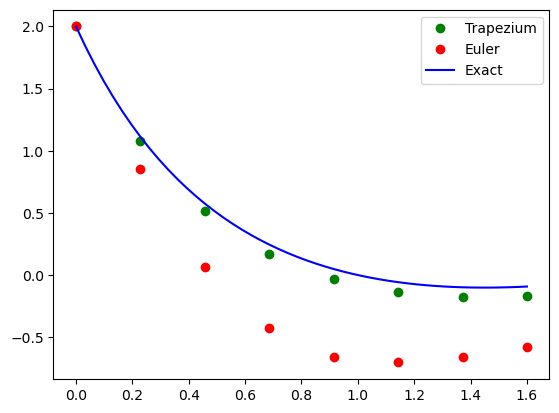

In [71]:
def dfdy(x, y):
    return 2*y

X = 1.6; N = 8
xs = np.linspace(0, X, N)
ys = trapezium_demo(f, dfdy, y0, xs)

# Let's compare with the true solution, and with Euler
plt.plot(xs, ys, 'go', label='Trapezium')
ys = euler_demo(f, y0, xs)
plt.plot(xs, ys, 'ro', label='Euler')
xs_plot = np.linspace(0, X)
plt.plot(xs_plot, y_exact(xs_plot), 'b', label='Exact')
plt.legend();

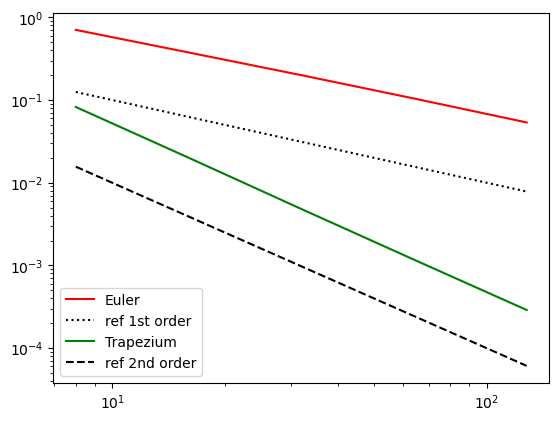

In [72]:
Ns = 8 * np.array([2**n for n in range(5)])
err_euler = np.zeros(np.size(Ns))
err_trapz = np.zeros(np.size(Ns))
for n in range(np.size(Ns)):
    N = Ns[n]
    xs = np.linspace(0, X, N)
    ys_exact = y_exact(xs)
    ys_euler = euler_demo(f, y0, xs)
    ys_trapz = trapezium_demo(f, dfdy, y0, xs)
    err_euler[n] = np.max(np.abs(ys_euler - ys_exact))
    err_trapz[n] = np.max(np.abs(ys_trapz - ys_exact))

plt.loglog(Ns, err_euler, 'r', label='Euler')  
plt.loglog(Ns, np.array(Ns, dtype=float)**(-1), 'k:', label='ref 1st order')  
plt.loglog(Ns, err_trapz, 'g', label='Trapezium');
plt.loglog(Ns, np.array(Ns, dtype=float)**(-2), 'k--', label='ref 2nd order')  
plt.legend();

## Example: backward Euler

This is a first order method which looks like the (forward) Euler but is actually closer (but worse) then the Trapezium method.

The update rule is
$$ y_{n+1} = y_n + hf(x_{n+1}, y_{n+1}),$$
so it is again an implicit method and we need some way of solving for $y_{n+1}$. Let's try the previous problem one more time.

In [84]:
def beuler_demo(f, dfdy, y0, x):
    '''Backward Euler's method'''
    N = np.size(x)
    h = x[1] - x[0] # suppose uniform mesh
    y = np.zeros(N)
    y[0] = y0
    for n in range(N-1):
        def F(yy):
            return yy - y[n] - h * f(x[n+1], yy)
        def dF(yy):
            return 1 - h * dfdy(x[n+1], yy)
        y[n+1] = opt.newton(F, y[n], dF)
    return y

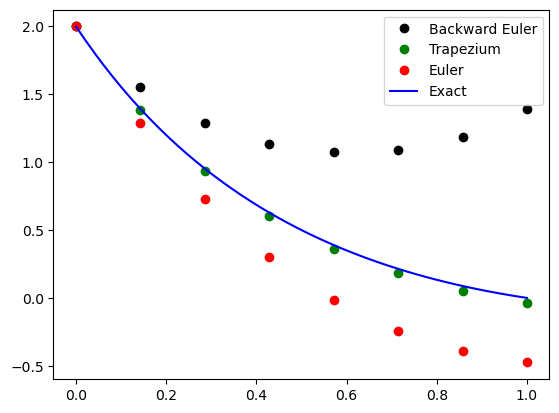

In [91]:
X = 1.0; N = 8
xs = np.linspace(0, X, N)
ys = beuler_demo(f, dfdy, y0, xs)

plt.plot(xs, ys, 'ko', label='Backward Euler')

# Let's compare with the true solution, and the previous methods
ys = trapezium_demo(f, dfdy, y0, xs)
plt.plot(xs, ys, 'go', label='Trapezium')
ys = euler_demo(f, y0, xs)
plt.plot(xs, ys, 'ro', label='Euler')
xs_plot = np.linspace(0, X)
plt.plot(xs_plot, y_exact(xs_plot), 'b', label='Exact')
plt.legend();

# Asymptotical stability as $x$ grows

Let $\lambda > 0$, $y_0 \in \mathbb R$, and consider the equation 

\begin{align*}
y' = -\lambda y, \quad y(0) = y_0.
\end{align*}

The solution is $y(x) = e^{-\lambda x} y_0$ and $|y(x)| \to 0$ as $x \to \infty$.

Applying Euler's method to the equation gives

\begin{align*}
y_{n+1} = y_n - h \lambda y_n,
\end{align*}

and an induction shows that $y_n = (1-h\lambda)^n y_0$. If $h \lambda > 2$ then $1 - h\lambda < -1$,
and $|y_n| \to \infty$ as $n \to \infty$, assuming that $y_0 \ne 0$. 

Although the exact solution converges very fast to zero when $\lambda \gg 1$, the approximation given by Euler's method diverges unless $h < 2 / \lambda$.

Applying the trapezium rule to the same equation gives

\begin{align*}
y_{n+1} = y_n - \frac h 2 \lambda(y_n + y_{n+1}) \quad \iff \quad 
\left(1 + \frac {h\lambda} 2 \right) y_{n+1} = \left(1 - \frac {h\lambda} 2 \right) y_n.
\end{align*}

Writing $c = h\lambda /2$, an induction gives

\begin{align*}
y_n = \left(\frac{1-c}{1+c}\right)^n y_0. 
\end{align*}

It is easy to see that $|y_n| \to 0$ as $n \to \infty$, regardless of the choice of $h > 0$. Implicit methods have typically better behaviour than explicit methods when $x$ is large.  

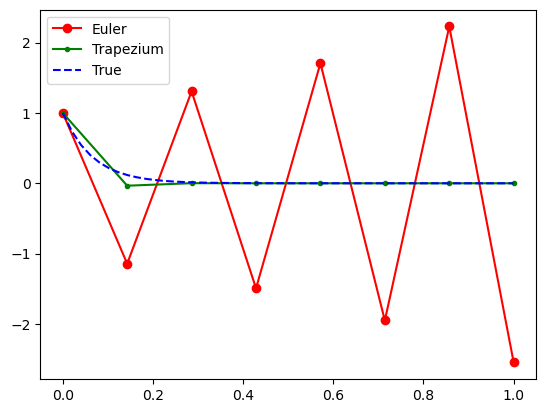

In [92]:
lam = 15
def f(x,y):
    return -lam*y
def dfdy(x,y):
    return -lam
def ytrue(x):
    return np.exp(-lam*x)
y0 = 1
X = 1; N = 8
xs = np.linspace(0, X, N)
ys = euler_demo(f, y0, xs)
plt.plot(xs, ys, 'ro-', label='Euler')
ys = trapezium_demo(f, dfdy, y0, xs)
plt.plot(xs, ys, 'g.-', label='Trapezium')
xs_plot = np.linspace(0, X)
plt.plot(xs_plot, ytrue(xs_plot), 'b--', label='True')
plt.legend();

# Systems of differential equations

The equation 

$$
\mathbf y' = \mathbf f(t, \mathbf y)
$$

gives a system of differential equations for $\mathbf y(t)$ when $\mathbf f : \mathbb R \times \mathbb R^n \to \mathbb R^n$ is a continuously differentiable function and $n = 2, 3, \dots$.

The above discussion applies without changes to systems. 

## Stiffness

Let $\lambda_1, \lambda_2 > 0$ and $\mathbf y_0 \in \mathbb R^2$, write

$$
\mathbf y_0 = 
\begin{pmatrix}
y_0^1 \\ y_0^2
\end{pmatrix},
\quad
\Lambda = 
\begin{pmatrix}
\lambda_1 & \\ & \lambda_2
\end{pmatrix},
$$

and consider the equation 

$$
\mathbf y'
= 
-\Lambda \mathbf y, \quad \mathbf y(0) = \mathbf y_0.
$$

The solution is 

$$
\mathbf y(t) = 
\begin{pmatrix}
e^{-\lambda_1 t} y_0^1 
\\
e^{-\lambda_2 t} y_0^2
\end{pmatrix},
$$

and $|\mathbf y(t)| \to 0$ as $t \to \infty$. 

Applying Euler's method to the equation gives $\mathbf y_{n+1} = \mathbf y_n - h\Lambda \mathbf y_n$,
and an induction shows that 

$$
\mathbf y_{n} = 
\begin{pmatrix}
(1 - h\lambda_1)^n y_0^1 
\\
(1 - h\lambda_2)^n y_0^2
\end{pmatrix}.
$$

Now $|\mathbf y_n| \to 0$ as $n \to \infty$ only if $h < 2/\lambda_j$, $j=1,2$. 

We say that the system $\mathbf y' = -\Lambda \mathbf y$ is stiff if $\lambda_1 \ll \lambda_2$. 
This is an informal definition: what it means for $\lambda_2$ to be large in comparison to $\lambda_1$ is context dependent. We can think that a stiff system has two distinct time scales.

More generally, for $A \in \mathbb C^{n \times n}$, the system 
$\mathbf y' = A \mathbf y$ is said to be stiff if the eigenvalues of $A$ have negative real parts and if $|\mathrm{Re}\lambda_1| \ll |\mathrm{Re}\lambda_2|$ for some eigenvalues $\lambda_1$ and $\lambda_2$. Even more generally, we may consider an equation of the form $\mathbf y' = \mathbf f(t, \mathbf y)$ and look at the eigenvalues of $A = \partial_{\mathbf y} \mathbf f(s, \mathbf z)$ for some $s$ and $\mathbf z$. As a rule of thumb, implicit methods should be used for stiff systems.

In [93]:
# We need to modify the methods slightly to make them work in any dimension

def euler_demo_ndim(f, y0, x):
    '''Euler's method'''
    N = np.size(x)
    h = x[1] - x[0] # suppose uniform mesh
    y = np.zeros((N, *np.shape(y0)))
    y[0] = y0
    for n in range(N-1):
        y[n+1] = y[n] + h * f(x[n],y[n]) 
    return y

def trapezium_demo_ndim(f, dfdy, y0, x):
    '''Trapezium rule method'''
    N = np.size(x)
    h = x[1] - x[0] # suppose uniform mesh
    y = np.zeros((N, *np.shape(y0)))
    y[0] = y0
    for n in range(N-1):
        def F(yy):
            return yy - y[n] - h/2 * (f(x[n], y[n]) + f(x[n+1], yy))
        def dF(yy):
            return 1 - h/2 * dfdy(x[n+1], yy)
        sol = opt.root(F, y[n], jac=dF)
        y[n+1] = sol.x 
    return y

## Example: stiff system

Consider the system $\mathbf y' = A \mathbf y$ with the initial condition $\mathbf y(0) = \mathbf y_0$ where 

$$
A = \begin{pmatrix}
-8003 & 1999
\\
23988 & -6004
\end{pmatrix},
\quad
\mathbf y_0 = \begin{pmatrix}
1 \\ 4
\end{pmatrix}.
$$

The first component of the exact solution is $e^{-7x}$, see p. 345 of the book.

In [94]:
A = np.array([
[-8003, 1999],
[23988, -6004],
], dtype=float)
def f(x, y):
    return A @ y
def dfdy(x, y):
    return A
def y1_exact(x):
    return np.exp(-7*x)

y0 = np.array([1, 4], dtype=float)
h = 0.004
N = 14
xs = np.arange(0, N*h, h)
y1_euler = euler_demo_ndim(f, y0, xs)[:,0]
y1_trapz = trapezium_demo_ndim(f, dfdy, y0, xs)[:,0]

In [95]:
print(f'{np.linalg.eigvals(A) = }')
import pandas as pd
df = pd.DataFrame({'x': xs, '$y_1$': y1_exact(xs), 'Trapezium': y1_trapz, 'Euler': y1_euler})
df.style.format('{:.3f}')

np.linalg.eigvals(A) = array([-1.4e+04, -7.0e+00])


,x,$y_1$,Trapezium,Euler
0,0.000,1.000,1.000,1.000
1,0.004,0.972,0.972,0.972
2,0.008,0.946,0.946,0.945
3,0.012,0.919,0.919,0.918
4,0.016,0.894,0.894,0.893
5,0.020,0.869,0.869,0.868
6,0.024,0.845,0.845,0.843
7,0.028,0.822,0.822,0.820
8,0.032,0.799,0.799,0.797
9,0.036,0.777,0.777,0.773


## Example: geodesics

Let $g : \mathbb R^n \to \mathbb R^{n \times n}$ be a smooth (i.e. infinitely many times differentiable) function that takes values in symmetric positive definite matrices. In other words, $g(x)$ is an inner product on $\mathbb R^n$ for each $x \in \mathbb R^n$. Such $g$ is called a [Riemannian metric](https://en.wikipedia.org/wiki/Riemannian_manifold) on $\mathbb R^n$. 

A continuous function $\gamma : [a, b] \to \mathbb R^n$, with $a < b$, gives a curve in $\mathbb R^n$, and if $\gamma$ is differentiable, we can define its length with respect to $g$ by 

$$
L(\gamma) = \int_a^b \sqrt{\dot \gamma^j(t) g_{jk}(\gamma(t)) \dot \gamma^k(t)} dt.
$$

Here $\dot \gamma = \partial_t \gamma$ is the derivative of $\gamma$ and we are using the [Einstein summation notation](https://en.wikipedia.org/wiki/Einstein_notation).

If $\gamma$ is a local minimizer of the length functional $L$ among curves with the same end points, then it satisfies the [Euler–Lagrange equations](https://en.wikipedia.org/wiki/Euler%E2%80%93Lagrange_equation)

$$
\ddot \gamma^i + \Gamma_{kl}^i \dot \gamma^k \dot \gamma^l = 0,
\qquad i=1,\dots,n,
$$

where $\ddot \gamma = \partial_t^2 \gamma$, and the [Christoffel symbols](https://en.wikipedia.org/wiki/Christoffel_symbols) are defined by

$$
\Gamma_{kl}^i = \frac{1}{2} g^{im} \left(\frac{\partial g_{mk}}{\partial x^l} + \frac{\partial g_{ml}}{\partial x^k} - \frac{\partial g_{kl}}{\partial x^m} \right).
$$

Here the $g^{im}$, with the indices as a superscript, stands for the inverse of the matrix $g$.

To simplify the discussion, we will now assume that $n=2$.
We write $x^0$ and $x^1$ for the coordinates on $\mathbb R^2$ as indexing starting from zero is convenient with Python. 
Moreover, we define 

$$
y = (y^0, y^1, y^2, y^3) =(\gamma^0, \gamma^1, \dot \gamma^0, \dot \gamma^1).
$$

Then $y' = f(t, y)$ where 

\begin{align*}
f(t, y)
&= 
(\dot \gamma^0, \dot \gamma^1, -\Gamma_{kl}^0 \dot \gamma^k \dot \gamma^l, -\Gamma_{kl}^1 \dot \gamma^k \dot \gamma^l)
\\&=
(y^2, y^3, -\sum_{k,l=0}^1 \Gamma_{kl}^0 y^{k+2} y^{l+2}, -\sum_{k,l=0}^1 \Gamma_{kl}^1 y^{k+2} y^{l+2}).
\end{align*}

Let $g(x) = c^{-2}(x) I$ where $I$ is the identity matrix and $c(x)$ is a strictly positive function. 

This case arises, for example, when we study trajectories of [wave packet](https://en.wikipedia.org/wiki/Wave_packet) solutions to the wave equation 

$$
\partial_t^2 u - c^2(x) \Delta u = 0,
$$

with a spatially varying wave speed $c(x)$. We take

$$
c(x^0, x^1) = 1 + x^1.
$$

This can be thought as a toy model for Earth's mantle with the $x^1$ coordinate giving the depth from the surface. The speed of [seismic waves](https://en.wikipedia.org/wiki/Seismic_wave) increases in depth.

In [96]:
import sympy as sp
x0 = sp.Symbol('x0')
x1 = sp.Symbol('x1')
x = [x0, x1] # Point in the plane
c_expr = 1 + x1 # Symbolic expression for wave speed
g = c_expr**(-2)*sp.eye(2) # Riemannian metric associated to the wave speed

def Gamma_expr(i, k, l):
    '''Symbolic expressions for Christoffel symbols'''
    out = 0
    for m in [0,1]:
        out += 1/2 * g.inv()[i, m] * (
            sp.diff(g[m, k], x[l]) + sp.diff(g[m, l], x[k]) - sp.diff(g[k, l], x[m]))
    return sp.simplify(out)

# Wave speed and Christoffel symbols as functions
c = sp.lambdify([x0, x1], c_expr)
Gamma = [[[sp.lambdify([x0, x1], Gamma_expr(i, k, l)) 
            for l in [0,1]] for k in [0,1]] for i in [0,1]]

def f(t, y): 
    '''Right-hand side corresponding to Euler-Lagrange equations for geodesics'''
    out = np.zeros(4)
    out[0], out[1] = y[2], y[3] 
    for k in [0,1]:
        for l in [0,1]:
            out[2] -= Gamma[0][k][l](y[0], y[1]) * y[k+2] * y[l+2]
            out[3] -= Gamma[1][k][l](y[0], y[1]) * y[k+2] * y[l+2]
    return out

In [97]:
def geod(x0, x1, alpha, ts):
    '''Solve the geodesic gamma(t) starting from point (x0, x1) to the direction
        that has angle alpha with the x0 axis for t in ts'''
    y0 = np.array([x0, x1, np.cos(alpha), np.sin(alpha)]) 
    ys = euler_demo_ndim(f, y0, ts)
    # Throw away the derivative of gamma
    return ys[:,0], ys[:,1]

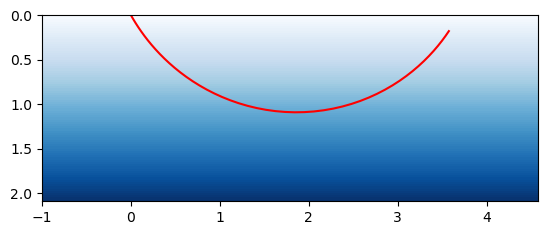

In [98]:
# Plot a geodesic
ts = np.linspace(0, 2.5)
alpha = np.pi/3
xs, ys = geod(0, 0, alpha, ts)
plt.plot(xs, ys, 'r')

# Plot the wave speed
xmin, xmax = np.min(xs) - 1, np.max(xs) + 1
ymin, ymax = 0, np.max(ys) + 1
xs = np.linspace(xmin, xmax)
ys = np.linspace(ymin, ymax)
Xs, Ys = np.meshgrid(xs, ys)
plt.contourf(Xs, Ys, c(Xs, Ys), 100, cmap='Blues')
ax = plt.gca()
ax.set_aspect(1)
ax.invert_yaxis() # Invert the y axis as we think x1 (i.e. y) coordinate as depth

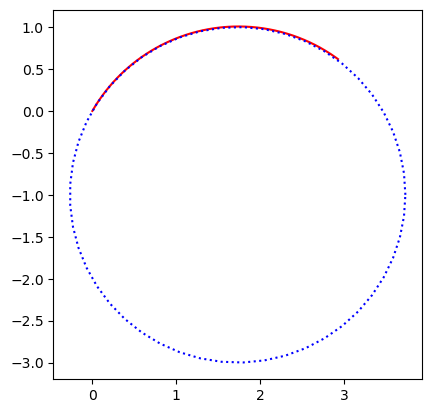

In [99]:
# The geodesic looks like an arc of a circle
ts = np.linspace(0, 2, 500) 
xs, ys = geod(0, 0, alpha, ts)
plt.plot(xs, ys, 'r')

thetas = np.linspace(0, 2*np.pi) 
r = np.sqrt(1 + np.tan(alpha)**2)
plt.plot(r*np.cos(thetas) + np.tan(alpha), r*np.sin(thetas)-1, 'b:')
plt.gca().set_aspect(1)

It is a classical homework problem in [calculus of variations](https://en.wikipedia.org/wiki/Calculus_of_variations) to show that the geodesics corresponding to the wave speed $c(x^0, x^1) = 1 + x^1$ are arcs of circles. Here is a formulation of the problem using a different physical motivation. You can try to solve it if you are familiar with calculus of variations.

Light travels in a medium in which the speed of light $c(x,y)$ is a function of
position. [Fermat's principle](https://en.wikipedia.org/wiki/Fermat's_principle) states that the time required for light to travel between two points is the minimum relative to all possible paths connecting the two points.

(a) Show that the time for the light to travel from point $(x_1,y_1)$ to $(x_2, y_2)$ along the path $y(x)$ is

$$
T= \int_{x_1}^{x_2} \frac{\sqrt{1+(y')^2}}{c(x,y)} d x.
$$

(b) If light is emitted from the origin making an angle $0 < \alpha < 
\pi/2$ with the positive $x$-axis in a medium in which $c(x,y)=1+y$, show that the light travels in a circle with centre $(x,y)=(\tan \alpha,-1)$. Hint use the [Beltrami identity](https://en.wikipedia.org/wiki/Beltrami_identity).

## Example: simple pendulum

Simple pendulum (without friction and air resistance) can be modelled as a second order ODE:
$$ \theta'' = \frac{d^2 \theta}{dt^2} = -g \sin(\theta),$$
where the angle $\theta$ is measured from the negative vertical axis and $g$ is the constant gravitational acceleration. The initial conditions are the initial angle $\theta(0) = \theta_0$ and speed $\theta'(0) = v_0$.

We can rewrite this as a system of 1st order ODEs:
$$ y(t) = \begin{pmatrix}
y_1(t) \\
y_2(t)
\end{pmatrix}, \ f(t,y) = \begin{pmatrix}
y_2 \\
-g \sin(y_1)
\end{pmatrix}.$$

In [54]:
g = 9.81
theta0 = np.deg2rad(30)
v0 = 0

def f(y):
    return np.array([y[1], -g*np.sin(y[0])])

N = 1000
ys = np.zeros((N,2))
h = 0.01

# Initial condition
ys[0,0] = theta0
ys[0,1] = v0

# Euler's method
for n in range(1,N):
    ys[n] = ys[n-1] + h*f(ys[n-1])

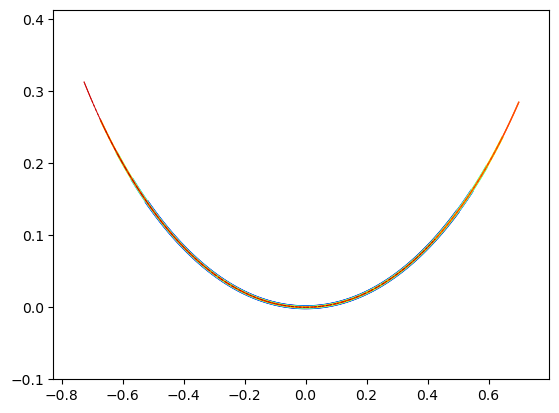

In [64]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

L = 1 # Length of pendulum
X = L*np.sin(ys[:,0])
Y = L*(1 - np.cos(ys[:,0]))
XY = np.stack([X,Y], axis=1)

fig, ax = plt.subplots()
cm = plt.get_cmap('jet')

segs = [[XY[i], XY[i+1]] for i in range(N-1)]
line_segments = LineCollection(segs, array=range(N), linewidths=np.linspace(3,0.5,N), linestyles='dashed', cmap=cm)

ax.set_xlim(np.min(X)-0.1, np.max(X)+0.1)
ax.set_ylim(-0.1, np.max(Y)+0.1)
ax.add_collection(line_segments);


# Solving differential equations with SciPy

Function [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) can be used to solve systems of differential equations, see the [introduction](https://docs.scipy.org/doc/scipy/tutorial/integrate.html#ordinary-differential-equations-solve-ivp). The `method` parameter of this function can be used to choose an explicit Runge-Kutta method `RK23`, `RK45`, or `DOP853` (these type of methods are discussed in Section 12.5 of [the book](#thebook)), an implicit multistep method `BDF` (see Section 12.11), and an  implicit Runge-Kutta method `Radau` (see Section 12.12). Finally, the method `LSODA` is a wrapper of a solver from [ODEPACK](https://computing.llnl.gov/projects/odepack) with automatic stiffness detection.